# This code will read in a SNPP aerosol netcdf file using xarray. It will plot a global map, a map centered on California and then a multipanel plot.

### Example by Bonne Ford 
#### June 2022

In [1]:
#November 2019#
# Import necessary modules
import xarray  
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mplt
import pylab as pl

ModuleNotFoundError: No module named 'xarray'

In [4]:
# Read in the file using xarray
#snppdata=xarray.open_dataset('./SNPP/AERDB_M3_VIIRS_SNPP.A2021274.011.2021312000541.nc')   # The 'M3' means monthly level 3 data.
snppdata=xarray.open_dataset(r'C:\Users\larterburn\Python Notebooks\Ploting_AOD\viirs_snpp_dbaod2019\AERDB_M3_VIIRS_SNPP.A2019305.011.2021099143341.nc')   # The 'M3' means monthly level 3 data.

#AERDB_M3_VIIRS_SNPP.A2019001.011.2021099143339.nc

In [5]:
# List all the datasets and attributes
snppdata

<xarray.Dataset>
Dimensions:                                                      (Latitude_1D: 180, Longitude_1D: 360, Aerosol_Types: 8, Land_Bands: 3, Ocean_Bands: 7)
Coordinates:
  * Aerosol_Types                                                (Aerosol_Types) int32 ...
  * Land_Bands                                                   (Land_Bands) float32 ...
    Latitude                                                     (Latitude_1D, Longitude_1D) float32 ...
  * Latitude_1D                                                  (Latitude_1D) float32 ...
    Longitude                                                    (Latitude_1D, Longitude_1D) float32 ...
  * Longitude_1D                                                 (Longitude_1D) float32 ...
  * Ocean_Bands                                                  (Ocean_Bands) float32 ...
Data variables: (12/37)
    Aerosol_Optical_Thickness_550_Land_Count                     (Latitude_1D, Longitude_1D) float64 ...
    Aerosol_Optical_Thickness_550_Land_Maximum                   (Latitude_1D, Longitude_1D) float32 ...
    Aerosol_Optical_Thickness_550_Land_Mean                      (Latitude_1D, Longitude_1D) float32 ...
    Aerosol_Optical_Thickness_550_Land_Minimum                   (Latitude_1D, Longitude_1D) float32 ...
    Aerosol_Optical_Thickness_550_Land_Ocean_Count               (Latitude_1D, Longitude_1D) float64 ...
    Aerosol_Optical_Thickness_550_Land_Ocean_Maximum             (Latitude_1D, Longitude_1D) float32 ...
    ...                                                           ...
    Spectral_Aerosol_Optical_Thickness_Land_Count                (Land_Bands, Latitude_1D, Longitude_1D) float64 ...
    Spectral_Aerosol_Optical_Thickness_Land_Mean                 (Land_Bands, Latitude_1D, Longitude_1D) float32 ...
    Spectral_Aerosol_Optical_Thickness_Land_Standard_Deviation   (Land_Bands, Latitude_1D, Longitude_1D) float32 ...
    Spectral_Aerosol_Optical_Thickness_Ocean_Count               (Ocean_Bands, Latitude_1D, Longitude_1D) float64 ...
    Spectral_Aerosol_Optical_Thickness_Ocean_Mean                (Ocean_Bands, Latitude_1D, Longitude_1D) float32 ...
    Spectral_Aerosol_Optical_Thickness_Ocean_Standard_Deviation  (Ocean_Bands, Latitude_1D, Longitude_1D) float32 ...
Attributes: (12/58)
    description:                       VIIRS Deep Blue Level 3 monthly aeroso...
    comment:                           Data are the arithmetic mean of all VI...
    references:                        https://deepblue.gsfc.nasa.gov
    institution:                       NASA Goddard Space Flight Center
    production_datetime:               2021-04-09T14:33:41Z
    geospatial_lat_max:                90.0
    ...                                ...
    creator_institution:               Space Science & Engineering Center, Un...
    publisher_name:                    LAADS
    publisher_url:                     https://ladsweb.modaps.eosdis.nasa.gov/
    publisher_email:                   modis-ops@lists.nasa.gov
    publisher_institution:             NASA Level-1 and Atmosphere Archive & ...
    xmlmetadata:                       <?xml version="1.0"?>\n<!DOCTYPE Granu...

## Now plot the AOD

Text(0.5, 1.0, 'November 2019 Average')

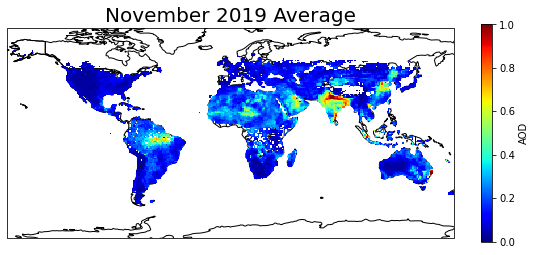

In [6]:
fig=plt.figure(figsize=(10,8))

# This sets up the plot region
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, 170, -80, 80], ccrs.PlateCarree())
ax.add_feature(cfeature.STATES) # Plot the state lines
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
# Use pcolormesh to plot the AOD 
cs=plt.pcolormesh(snppdata['Longitude'],snppdata['Latitude'],snppdata['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=1)

# Make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)
cbar.set_label('AOD')

# Put a title on the plot
ax.set_title('November 2019 Average', fontsize=20)

Text(0.5, 1.0, 'November 2019 Average')

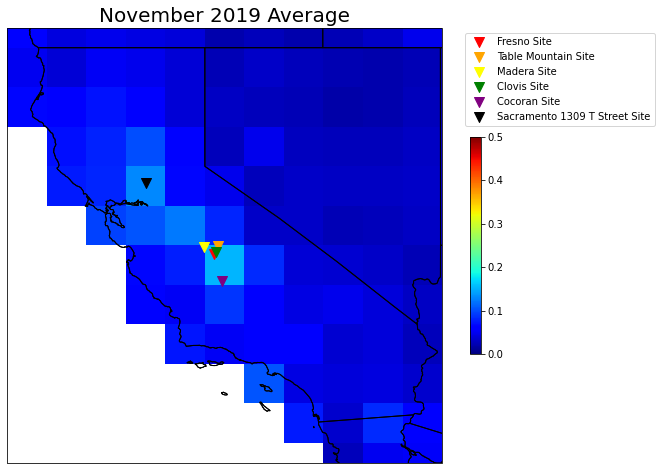

In [52]:
fig=plt.figure(figsize=(10,8))

# This just sets up the plot region
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(lon,lat,100,marker='v',color='red',zorder=10,label='Fresno Site')   
ax.scatter(lon_4,lat_3,100,marker='v',color='orange',zorder=10,label='Table Mountain Site') 
ax.scatter(lon_6,lat_5,100,marker='v',color='yellow',zorder=10,label='Madera Site') 
ax.scatter(lon_8,lat_7,100,marker='v',color='green',zorder=10,label='Clovis Site')
ax.scatter(lon_10,lat_9,100,marker='v',color='purple',zorder=10,label='Cocoran Site') 
ax.scatter(lon_12,lat_11,100,marker='v',color='black',zorder=10,label='Sacramento 1309 T Street Site') 
ax.set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
cs=plt.pcolormesh(snppdata['Longitude'],snppdata['Latitude'],snppdata['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=0.5)

ax.legend(scatterpoints=1, bbox_to_anchor=(1.50, 1.0))
ax.add_feature(cfeature.STATES) # Plot the state lines
ax.add_feature(cfeature.COASTLINE)

# Make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)


# Put a title on the plot
ax.set_title('November 2019 Average', fontsize=20)

Text(0.5, 0.98, 'November 2019 Averages')

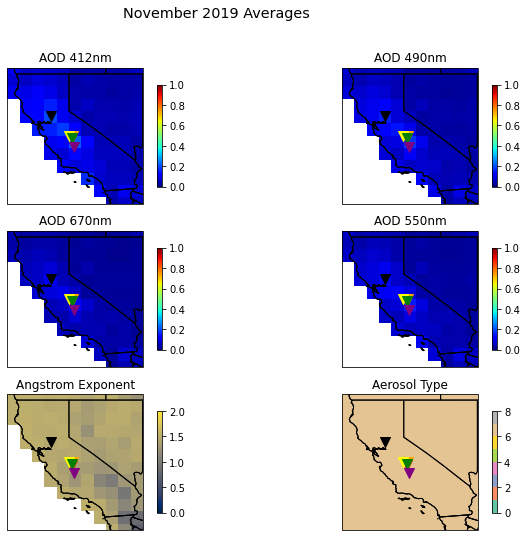

In [51]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
subplot_titles=['AOD 412nm', 'AOD 490nm','AOD 670nm','AOD 550nm','Angstrom Exponent','Aerosol Type']
axs=axs.flatten()
# Add in features (state/coast lines, grid lines and labels)
# Loop over the figures
for i in range (0,6):
        axs[i].set_extent([-125, -114, 31.5, 42.5], ccrs.PlateCarree())
        if (i <3):
            cs=axs[i].pcolormesh(snppdata['Longitude'],snppdata['Latitude'],snppdata['Spectral_Aerosol_Optical_Thickness_Land_Mean'][i,:,:],cmap='jet',vmin=0,vmax=1)
        elif (i ==3):
            cs=axs[i].pcolormesh(snppdata['Longitude'],snppdata['Latitude'],snppdata['Aerosol_Optical_Thickness_550_Land_Mean'],cmap='jet',vmin=0,vmax=1)    
        elif (i==4):
            cs=axs[i].pcolormesh(snppdata['Longitude'],snppdata['Latitude'],snppdata['Angstrom_Exponent_Land_Mean'],cmap='cividis',vmin=0,vmax=2)
        elif (i==5):
             cs=axs[i].pcolormesh(snppdata['Longitude'],snppdata['Latitude'],snppdata['Aerosol_Type_Land_Ocean_Mode'],cmap='Set2',vmin=0,vmax=8)
        axs[i].set_title(subplot_titles[i])
        axs[i].add_feature(cfeature.STATES) # Plot the state lines
        axs[i].add_feature(cfeature.BORDERS)
        axs[i].add_feature(cfeature.COASTLINE)
        axs[i].scatter(lon,lat,100,marker='v',color='red',zorder=10,label='Fresno Site')   
        axs[i].scatter(lon_4,lat_3,100,marker='v',color='orange',zorder=10,label='Table Mountain Site') 
        axs[i].scatter(lon_6,lat_5,100,marker='v',color='yellow',zorder=10,label='Madera Site') 
        axs[i].scatter(lon_8,lat_7,100,marker='v',color='green',zorder=10,label='Clovis Site')
        axs[i].scatter(lon_10,lat_9,100,marker='v',color='purple',zorder=10,label='Cocoran Site') 
        axs[i].scatter(lon_12,lat_11,100,marker='v',color='black',zorder=10,label='Sacramento 1309 T Street Site') 
        cax,kw = mplt.colorbar.make_axes(axs[i],location='right',pad=0.05,shrink=0.75)
        cbar = fig.colorbar(cs,cax=cax,**kw)   
        #axs[i].legend(scatterpoints=1,)        
fig.suptitle('November 2019 Averages',fontsize="x-large")    
                             

In [9]:
# The benefit of using xarray is that you can do a lot of dataframe style functions on it, which will be shown in future tutorials.

In [10]:
#Plotting fresno with cartopy
#importing packages
import numpy as np
import pylab as pl 
import pandas as pa
import csv 
#Uploading necessary imports
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib as mplt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [11]:
#reading in fresno's csv file
aqs_pm10='aqs_site_06-019-0011_81102.csv'
aqs_pm25='aqs_site_06-019-0011_88101.csv'

#saving csv file in a dataframe
df_pm10=pd.read_csv(aqs_pm10)
df_pm25=pd.read_csv(aqs_pm25)


In [50]:
#Tested sites lat and longs
#fresno
lat=36.78538
lon=-119.77321

#table mountain
lat_3=36.985119
lon_4=-119.658339

#madera
lat_5=36.953256
lon_6=-120.034203

#clovis
lat_7=36.819449 
lon_8=-119.716433

#cocoran
lat_9=36.102244
lon_10=-119.56565

#sacramento
lat_11=38.56844
lon_12=-121.49311

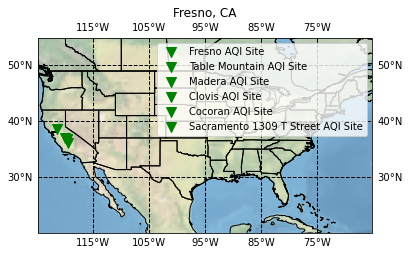

In [16]:
# Set up the plot region (the projection and area)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -65, 20,55], ccrs.PlateCarree())

# Put a background image on the plot
ax.stock_img()

# Plot the latitude and longitude
ax.scatter(lon,lat,100,marker='v',color='g',zorder=10,label='Fresno AQI Site')   
ax.scatter(lon_4,lat_3,100,marker='v',color='g',zorder=10,label='Table Mountain AQI Site') 
ax.scatter(lon_6,lat_5,100,marker='v',color='g',zorder=10,label='Madera AQI Site') 
ax.scatter(lon_8,lat_7,100,marker='v',color='g',zorder=10,label='Clovis AQI Site')
ax.scatter(lon_10,lat_9,100,marker='v',color='g',zorder=10,label='Cocoran AQI Site') 
ax.scatter(lon_12,lat_11,100,marker='v',color='g',zorder=10,label='Sacramento 1309 T Street AQI Site') 
# Add in features (state/coast lines, grid lines and labels)
ax.add_feature(cfeature.STATES) 
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True,linewidth=1, color='black', linestyle='--') 
gl.top_labels = True    # Don't put longitude labels on the top of the plot
gl.xlocator = mticker.FixedLocator([-125,-115,-105,-95,-85,-75,-65]) # Tell which longitudes to mark
gl.ylocator = mticker.FixedLocator([20,30,40,50,60])   # Tell which latitudes to mark
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#Plot title
ax.set_title('Fresno, CA',fontsize=12)
# Add a legend
plt.legend(,scatterpoints=1)